# Wizualizacje - Seaborn
Popularnym pakietem do wizualizacji jest Seaborn (http://seaborn.pydata.org/index.html). Umożliwia nam chyba najszybsze uzyskanie ładnych wykresów. Co więcej ma doskonałą dokumentację która zawiera galerię pelną ciekawych i inspirujących przykładów. Przykłady w tym notatniku pochodza właśnie z tej galerii (http://seaborn.pydata.org/examples/index.html).

Komenda %matplotlib inline informuje nasz notatnik, że ma wyświetlać wykresy jako output.

In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

## Histogramy
Najprostsze histogramy możemy uzyskać za pomocą distplota. W pierwszej kolejności wylosujemy sobie liczby z rozkładu normalnego, potem zmniejszymy domyślną wielkość obrazka. Jak widać seaborn również bazuje na matplotlibie, który stanowi podstawową bibliotekę pythona do rysowania (szcegóły tego pakietu omówimy później).

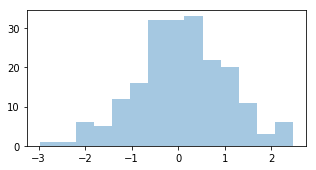

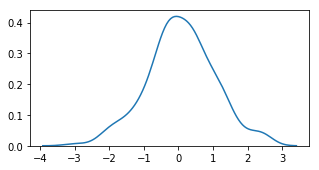

In [2]:
rs = np.random.RandomState(10)
d = rs.normal(size=200)


matplotlib.rcParams['figure.figsize'] = (5.0, 2.5)

sns.distplot(d, kde=False)
plt.show()

sns.distplot(d, hist=False)
plt.show()

# sns.distplot(d)
plt.show()

In [3]:
d

array([ 1.3315865 ,  0.71527897, -1.54540029, -0.00838385,  0.62133597,
       -0.72008556,  0.26551159,  0.10854853,  0.00429143, -0.17460021,
        0.43302619,  1.20303737, -0.96506567,  1.02827408,  0.22863013,
        0.44513761, -1.13660221,  0.13513688,  1.484537  , -1.07980489,
       -1.97772828, -1.7433723 ,  0.26607016,  2.38496733,  1.12369125,
        1.67262221,  0.09914922,  1.39799638, -0.27124799,  0.61320418,
       -0.26731719, -0.54930901,  0.1327083 , -0.47614201,  1.30847308,
        0.19501328,  0.40020999, -0.33763234,  1.25647226, -0.7319695 ,
        0.66023155, -0.35087189, -0.93943336, -0.48933722, -0.80459114,
       -0.21269764, -0.33914025,  0.31216994,  0.56515267, -0.14742026,
       -0.02590534,  0.2890942 , -0.53987907,  0.70816002,  0.84222474,
        0.2035808 ,  2.39470366,  0.91745894, -0.11227247, -0.36218045,
       -0.23218226, -0.5017289 ,  1.12878515, -0.69781003, -0.08112218,
       -0.52929608,  1.04618286, -1.41855603, -0.36249918, -0.12

Jak widać w domyślnych ustawieniach wykresy są całkiem przyjemnedla oka i czytelne. Mamy do dyspozycji kilka domyślnych stylów, z których możemy korzystać. Jeżeli ciemno-szara kolorystyka nam nie pasuje możemy wykorzystać jasną. Dodatkowo, w ostatnim z wykresów możemy np. zamalować obszar pod krzywą rozkładu. Poleceniem despine pozbywamy się obramowania wykresu, które jest domyślnie dodane dla stylu "white"

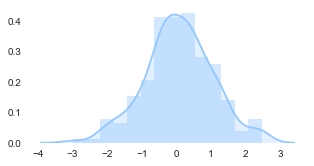

In [4]:
sns.set(style="white", palette="pastel", color_codes=True)
plt.figure(figsize=(5.0, 2.5))
sns.distplot(d, hist=True, color="b", kde_kws={"shade": True})
sns.despine(left=True, bottom=True)
plt.show()

## Wykresy dla dwóch zmiennych
Seaborn oferuje bardzo ciekawe możliwości rysowania wykresów dla dwóch zmiennych. Oprócz zwykłego scatterplota, lub rozszerzonego o histogramy bardzo łatwo możemy wygenerować hexheatmap lub wykres KDF.

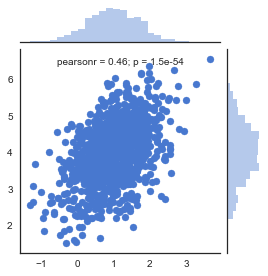

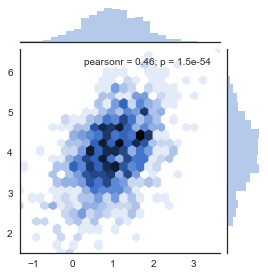

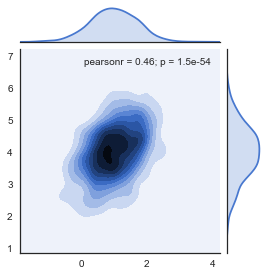

In [5]:
data = np.random.multivariate_normal([1,4],[[.5,.3], [.3,.8]],1000).T
sns.set(style="white", palette="muted", color_codes=True)
sns.jointplot(x=data[0], y=data[1], size=4)

sns.jointplot(x=data[0], y=data[1], kind="hex", size=4)
sns.jointplot(x=data[0], y=data[1], kind="kde", size=4)
plt.show()

## Wiele serii na jednym wykresie.
Poniższy przykład doskonale ilustruje to jak można dodać więcej serii do jednego wykresu.  

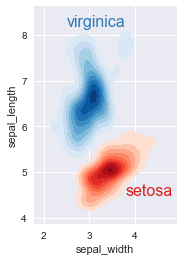

In [6]:
# Generujemy dane
iris = sns.load_dataset("iris")
setosa = iris.query("species == 'setosa'")
virginica = iris.query("species == 'virginica'")

sns.set(style="darkgrid")
# Polecenie zwraca "rozbija" obiekt wykresu na dwie zmienne, gdzie ax odnosi się do naszych serii danych.
f, ax = plt.subplots(figsize=(6, 4))
# Następnie upewniamy się, że obydwie serie będą w tej samej skali.
ax.set_aspect("equal")

# Dodajemy kolejne serie. Przy okazji zaznaczamy, zeby najniższy poziom nie był zamalowany.
ax = sns.kdeplot(setosa.sepal_width, setosa.sepal_length,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica.sepal_width, virginica.sepal_length,
                 cmap="Blues", shade=True, shade_lowest=False)

# Dodajemy etykiety w wybranych przez nas miejscach.
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(2.5, 8.2, "virginica", size=16, color=blue)
ax.text(3.8, 4.5, "setosa", size=16, color=red)
plt.show()

## Wykresi skrzypcowe i boxplot
Duzą popularnością cieszą się ostatnio wykresy skrzypcowe (ciolin charts). Zobaczmy dwa przykaldy z seaborna. Stanowią one swoiste rozszerzenie klasycznych boxplotów o ostymowane KDF. Pierwszy z poniższych przykładów pokazuje jak można w atrakcyjny graficznie sposób narysować wiele rozkładów. Zwróćmy jednak uwagę na to, że kazdy z wykresów skrzypcowych jest symetryczny. Wydaje się, że jest to niewykorzystany potencjał. Drugi przykład korzysta z opcji split, która pozwala każdą z połówek narysować osobno dla jednej z dwóch grup.

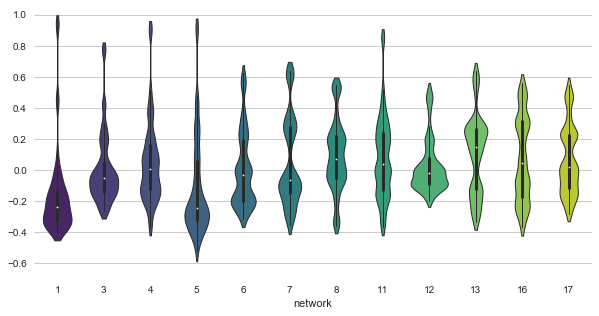

In [7]:
sns.set(style="whitegrid")

# Load the example dataset of brain network correlations
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Pull out a specific subset of networks
used_networks = [1, 3, 4, 5, 6, 7, 8, 11, 12, 13, 16, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Compute the correlation matrix and average over networks
corr_df = df.corr().groupby(level="network").mean()
corr_df.index = corr_df.index.astype(int)
corr_df = corr_df.sort_index().T

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 5))

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=corr_df, palette="viridis", bw=.2, cut=1, linewidth=1)

# Finalize the figure
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)

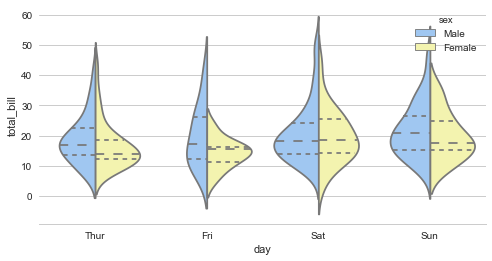

In [8]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Load the example tips dataset
tips = sns.load_dataset("tips")
plt.figure(figsize=(8.0, 4))
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True,
               inner="quart", palette={"Male": "b", "Female": "y"})
sns.despine(left=True)

Naturalnie klasyczny boxplot jest również dostępny:

/home/wilam/.local/lib/python3.6/site-packages/matplotlib/cbook.py:2052: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
/home/wilam/.local/lib/python3.6/site-packages/matplotlib/cbook.py:2053: RuntimeWarning: invalid value encountered in double_scalars
  hival = q3 + whis * stats['iqr']
/home/wilam/.local/lib/python3.6/site-packages/matplotlib/cbook.py:2066: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/home/wilam/.local/lib/python3.6/site-packages/matplotlib/cbook.py:2073: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)


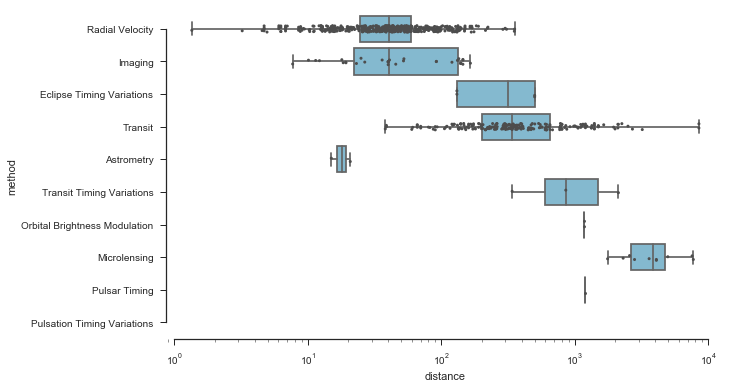

In [9]:
sns.set(style="ticks", palette="muted", color_codes=True)

# Load the example planets dataset
planets = sns.load_dataset("planets")

plt.figure(figsize=(10.0, 6))
# Plot the orbital period with horizontal boxes
ax = sns.boxplot(x="distance", y="method", data=planets,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="distance", y="method", data=planets,
              jitter=True, size=3, color=".3", linewidth=0)


# Make the quantitative axis logarithmic
ax.set_xscale("log")
sns.despine(trim=True)

## Dodatkowe ustawienia.
Seaborn jest idealny do robienia szybkich wykresów i zwykle nie warto zmieniać zbyt wielu ustawień. Niemniej jeżeli przjdzie nam na to ochota możemy dopasować każdy wykres do naszych potrzeb.
* http://seaborn.pydata.org/tutorial/aesthetics.html
* http://seaborn.pydata.org/tutorial/color_palettes.html